In [64]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math


In [65]:
bndR = cv2.imread('imgpack/LandSat_C/Landsat_C_04-11_R.png', cv2.IMREAD_GRAYSCALE)
bndG = cv2.imread('imgpack/LandSat_C/Landsat_C_03-11_G.png', cv2.IMREAD_GRAYSCALE)
bndB = cv2.imread('imgpack/LandSat_C/Landsat_C_02-11_B.png', cv2.IMREAD_GRAYSCALE)
bndNIR =cv2.imread('imgpack/LandSat_C/Landsat_C_05-11_NIR.png', cv2.IMREAD_GRAYSCALE)

In [66]:
def falso (bnd1,bnd2,bnd3):
    img= cv2.merge((bnd1,bnd2,bnd3))
    return img

In [67]:
def Histograma(img):
    " Para crear una lista ordenada con los valores"
    l=[0 for x in range(256)]
    for m in img:
        l2=m.tolist()
        for x in range(256):
            l[x]=l[x]+l2.count(x)
    return l

In [68]:
def Cmin (histograma,porcentaje):
    numpixel=sum(histograma)
    cont=0
    ret = numpixel * (porcentaje)
    for i in range(len(histograma)):
        if cont>ret:
            res=i
            break
        else:
            cont=cont+histograma[i]
    return res
    

In [69]:
def Cmax (histograma,porcentaje):
    numpixel=sum(histograma)
    cont=0
    ret = numpixel * (1-porcentaje)
    for i in range(len(histograma)):
        if cont>ret:
            res=i
            break
        else:
            cont=cont+histograma[i]
    return res

In [70]:
def expan (img, cmin, cmax):
    resimg = img.copy()
    ndmax=255
    ndmin=0
    for i in range(resimg.shape[0]):
        for j in range(resimg.shape[1]):
            if resimg[i][j] <= cmin:
                resimg[i][j]= 0
            elif resimg[i][j]>=cmax:
                resimg[i][j]= 255
            else:
                resimg[i][j]=ndmin+(((resimg[i][j]-cmin)*(ndmax-ndmin))/(cmax-cmin))
    return resimg

In [71]:
def corte(img,porc):
    his = Histograma(img)
    cmin = Cmin(his,porc)
    cmax = Cmax(his,porc)
    resimg=expan(img,cmin,cmax)
    return resimg

In [72]:
img = falso(bndR,bndG,bndB)

In [73]:
def cortehsv(img,band,porc):
    ##Band es un int que para 0 hace corte en S y 1 en V y 2 en las dos
    img_hsv=cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(img_hsv)
    
    if band == 0 :
        corteS = corte(s,porc)
        res = cv2.merge((h,corteS,v))
    elif (band == 1):
        corteV = corte(v,porc)
        res = cv2.merge((h,s,corteV))
    else:
        corteS = corte(s,porc)
        corteV = corte(v,porc)
        res=cv2.merge((h,corteS,corteV))
    resimg = cv2.cvtColor(res,cv2.COLOR_HSV2BGR)
    return resimg
        
    
    

In [74]:
img_s= cortehsv(img,0,0.01)
img_v=cortehsv(img,1,0.01)
img_sv=cortehsv(img,2,0.01)

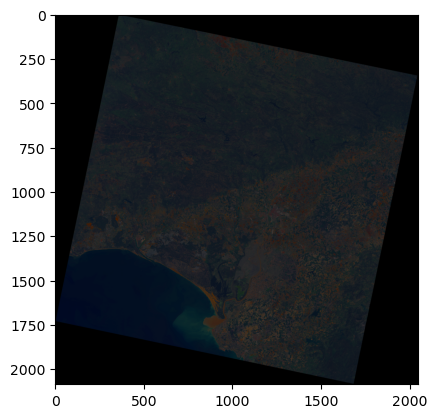

In [75]:
plt.imshow(img_s)

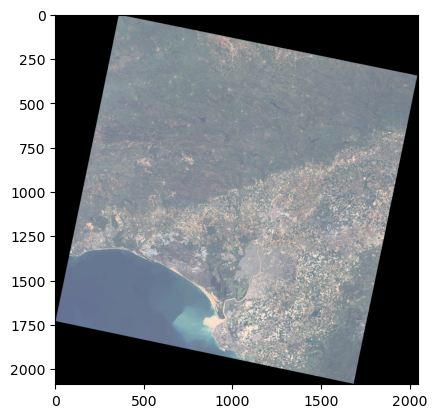

In [76]:
plt.imshow(img_v)

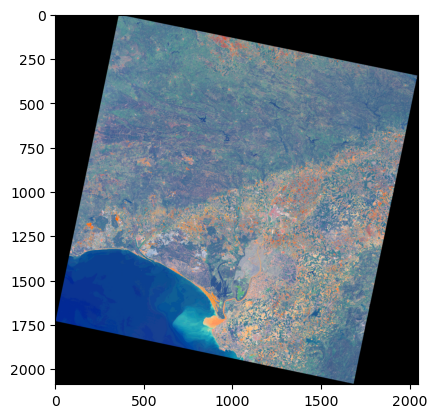

In [77]:
plt.imshow(img_sv,cmap='gray')